In [66]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import welch
from sklearn.impute import KNNImputer
from scipy.stats import kurtosis

In [67]:
# Define the directory of the train data
from pathlib import Path
train_data_dir = Path('train')

# Inspect the first file's columns
sample_file = os.path.join(train_data_dir, '0.csv')
sample_df = pd.read_csv(sample_file, sep=';')
print(sample_df.columns)

Index(['b1x', 'b1y', 'b4x', 'b4y'], dtype='object')


## a. Load the first sample (0.txt) and visualize the acceleration in the x direction of bearing 4. Compare this visualization to 3 other samples from different degradation stages.

In [127]:
def acceleration_data(csv_data):
    bearing_data = pd.read_csv(csv_data, delimiter=';')    
    bearing_data['x_velocity'] = bearing_data['b4x'].diff()
    bearing_data['x_acceleration'] = bearing_data['x_velocity'].diff()
    bearing_data['y_velocity'] = bearing_data['b4y'].diff()
    bearing_data['y_acceleration'] = bearing_data['y_velocity'].diff()
    
    # Impute the missing values
    imputer = KNNImputer(n_neighbors=5)
    data_imputed = imputer.fit_transform(bearing_data)
    bearing_data = pd.DataFrame(data_imputed, columns=bearing_data.columns)
        
    return bearing_data

## b. Make a function that, given an index, loads the corresponding sample and returns mean, standard deviation, and root mean squared of both x and y acceleration. 

In [128]:
def features_acceleration_data(bearing_data, index=-1):
    try:
        bearing_data['rms_x'] = np.sqrt(np.mean(bearing_data.x_acceleration**2))
        bearing_data['rms_y'] = np.sqrt(np.mean(bearing_data.y_acceleration**2))

        
        # Make a function that, given an index, loads the corresponding sample and returns mean, standard deviation,
        # and root mean squared of both x and y acceleration.

        if index or index == 0:
            print(f"Corresponding Sample: ({bearing_data.loc[index, 'b4x']},{bearing_data.loc[index, 'b4y']})")
            
            # Calculates the mean, standard deviation, and
            # root mean squared of both x and y acceleration
            sample_x = bearing_data.x_acceleration.iloc[index] 
            sample_y = bearing_data.y_acceleration.iloc[index] 

            mean_x = bearing_data.x_acceleration.mean()
            mean_y = bearing_data.y_acceleration.mean()
            std_x = bearing_data.x_acceleration.std()
            std_y = bearing_data.y_acceleration.std()
            rms_x = bearing_data.loc[index, 'rms_x']
            rms_y = bearing_data.loc[index, 'rms_y']
            
            # First feature to add: Spectral Flatness
            _, Pxx_x = welch(bearing_data.x_acceleration)
            spectral_flatness_x = np.exp(np.mean(np.log(Pxx_x))) / np.mean(Pxx_x)
            _, Pxy_y = welch(bearing_data.y_acceleration)
            spectral_flatness_y = np.exp(np.mean(np.log(Pxy_y))) / np.mean(Pxy_y)

            # Second feature to add: Kurtosis
            kurtosis_x = kurtosis(bearing_data.x_acceleration)
            kurtosis_y = kurtosis(bearing_data.y_acceleration)
    
            # print('Mean of X-acceleration:', mean_x)
            # print('Mean of Y-acceleration:', mean_y)
        
            # print('Stdev of X-acceleration:', std_x)
            # print('Stdev of Y-acceleration:', std_y)
            
            # print('RMS of X-acceleration:', rms_x)
            # print('RMS of Y-acceleration:', rms_y)
            
            # print('Spectral Flatness of X-acceleration:', spectral_flatness_x)
            # print('Spectral Flatness of Y-acceleration:', spectral_flatness_y)

            # print('Kurtosis of X-acceleration:', kurtosis_x)
            # print('Kurtosis of Y-acceleration:', kurtosis_y)
            
            features = {
                'mean_x': mean_x,
                'mean_y': mean_y,
                'std_x': std_x,
                'std_y': std_y,
                
                'rms_x': rms_x,
                'rms_y': rms_y,
                'spectral_flatness_x': spectral_flatness_x,
                'spectral_flatness_y': spectral_flatness_y,
                'kurtosis_x': kurtosis_x,
                'kurtosis_y': kurtosis_y
            }
            

    except KeyError:
        print('Invalid index (Out of bounds)')
    
    return features
features_acceleration_data(acceleration_data('0.csv'), index=100)

Corresponding Sample: (-0.178,-0.093)


{'mean_x': 6.523437500000183e-06,
 'mean_y': -1.1171874999999877e-05,
 'std_x': 0.10337733308692616,
 'std_y': 0.1411472410209575,
 'rms_x': 0.10337480940127532,
 'rms_y': 0.14114379544346786,
 'spectral_flatness_x': 0.2323692099418934,
 'spectral_flatness_y': 0.20705060316948912,
 'kurtosis_x': 2.479624915561657,
 'kurtosis_y': 3.186875227176894}

Why Spectral Flatness and Kurtosis? (Visualization Check)

In [146]:
# To simplify the visualization, we made a function.
def viz_acceleration_bearing_data(csv_data, y_column):
    bearing_data = acceleration_data(csv_data)
    y0 = bearing_data[y_column]
    X = bearing_data.index
    _, Pxx = welch(bearing_data[y_column])
    spectral_flatness = np.exp(np.mean(np.log(Pxx))) / np.mean(Pxx)
    kurtosis_ = kurtosis(bearing_data[y_column])

    plt.figure(figsize=(10, 8))
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.title(f'Acceleration in x-direction of Bearing 4 (Source = {csv_data})')
    plt.gcf().text(0.85, 0.17, f'Spectral Flatness: {spectral_flatness:.4f}', fontsize=10, horizontalalignment='right')
    plt.gcf().text(0.85, 0.20, f'Kurtosis: {kurtosis_:.4f}', fontsize=10, horizontalalignment='right')

    plt.hist(y0)


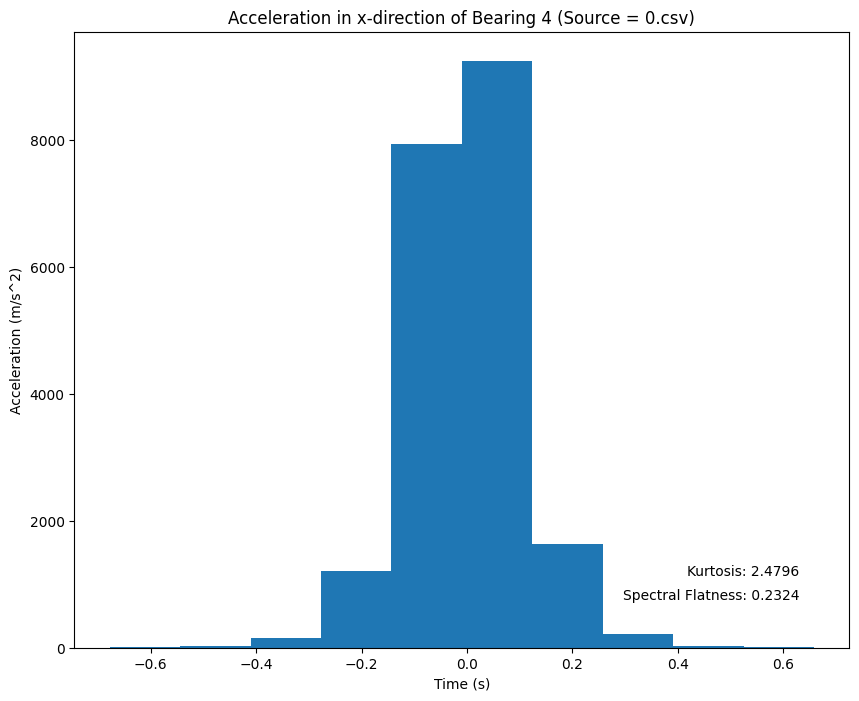

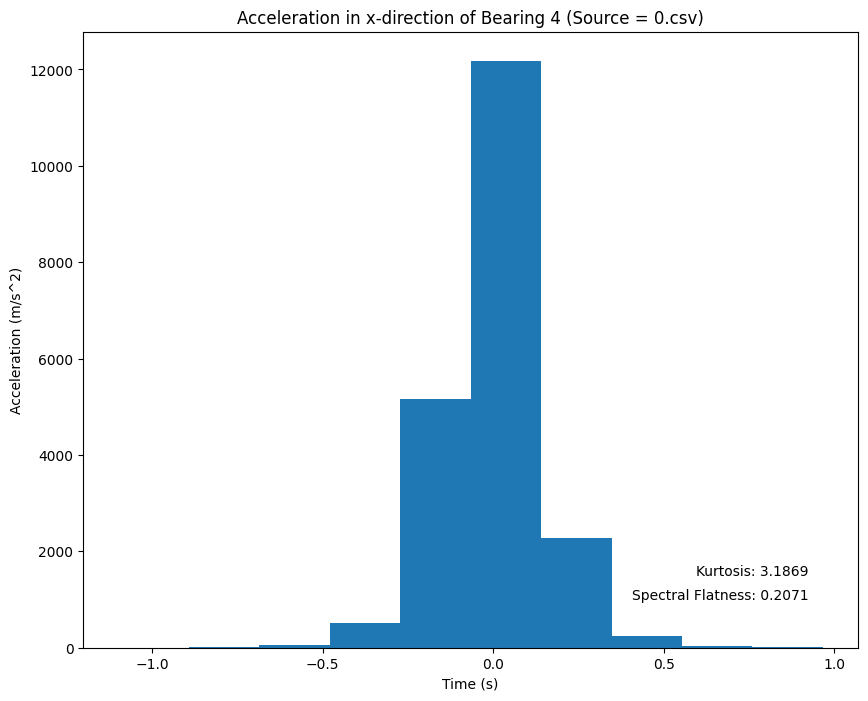

In [147]:
# Load the first sample (0.txt) and visualize the acceleration in the x direction of bearing 4. 
viz_acceleration_bearing_data('0.csv', 'x_acceleration')
viz_acceleration_bearing_data('0.csv', 'y_acceleration')

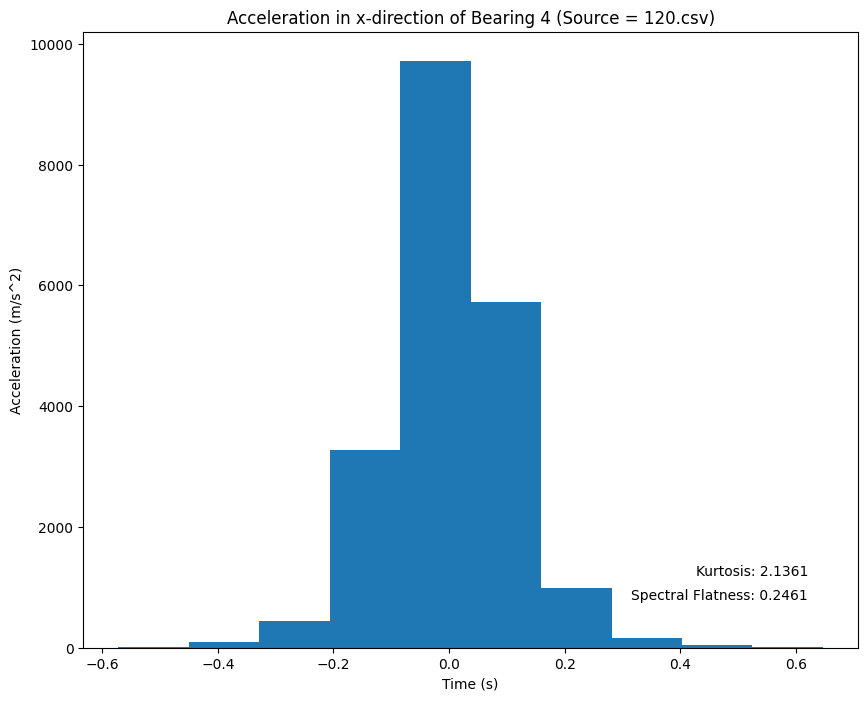

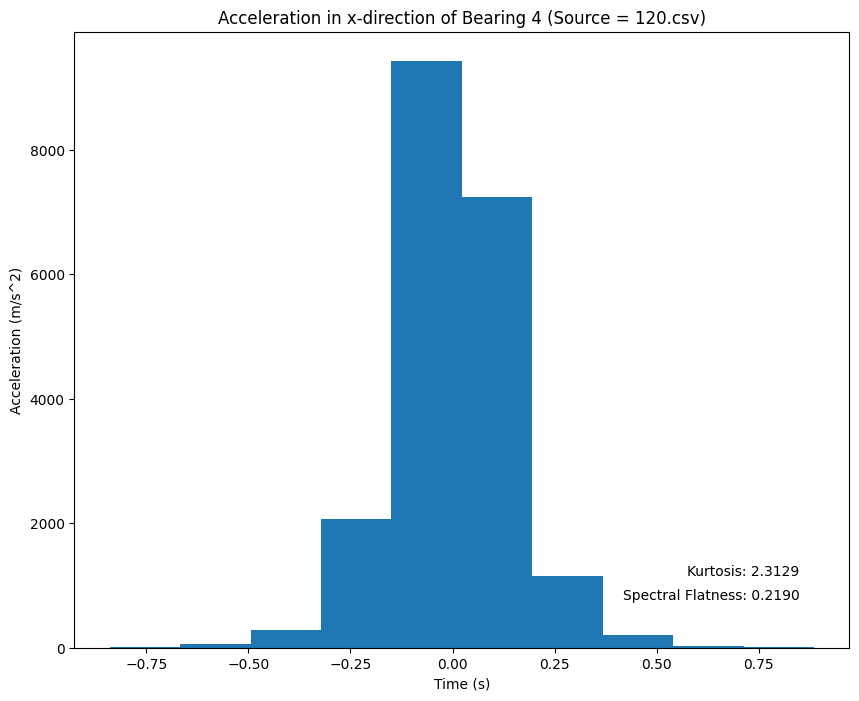

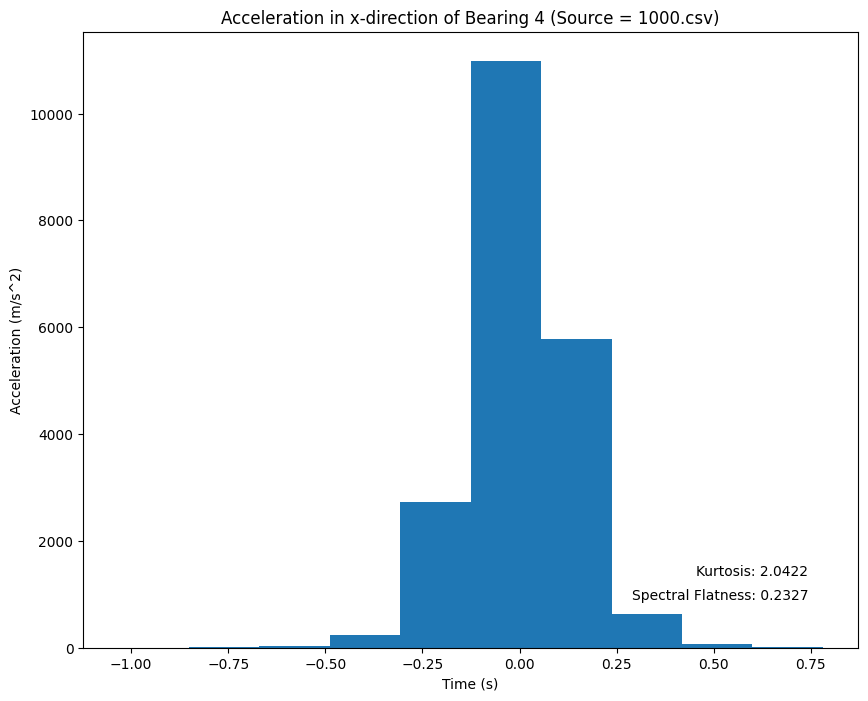

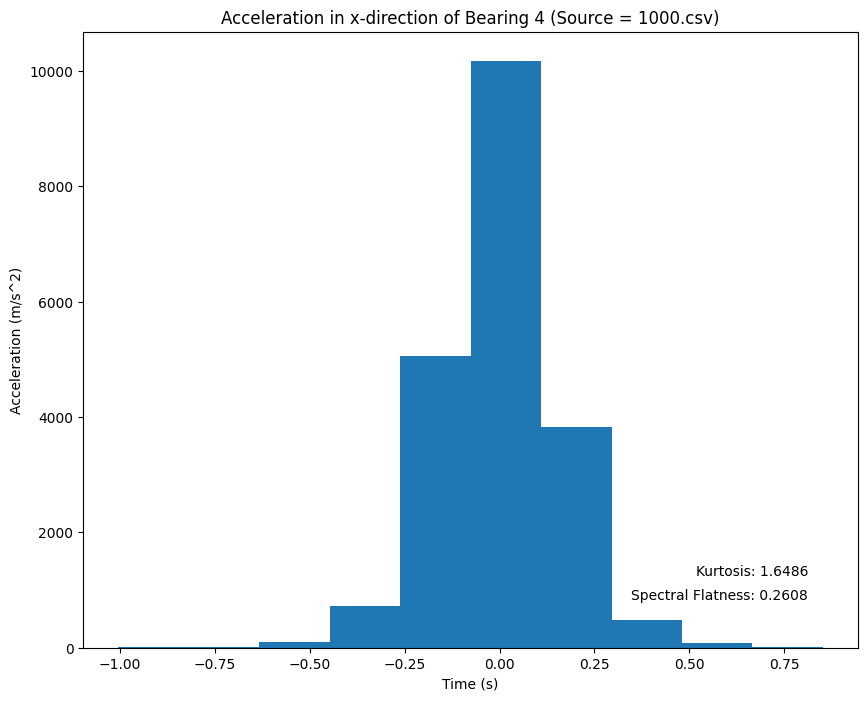

In [145]:
# Compare this visualization to 3 other samples from different degradation stages.
viz_acceleration_bearing_data('120.csv', 'x_acceleration')
viz_acceleration_bearing_data('120.csv', 'y_acceleration')
plt.show()
viz_acceleration_bearing_data('1000.csv', 'x_acceleration')
viz_acceleration_bearing_data('1000.csv', 'y_acceleration')
plt.show()
# viz_acceleration_bearing_data('1260.csv', 'x_acceleration')

# As we can see, the kurtosis value

In [148]:
## c. Apply the function from b. to the entire dataset and store your results in a dataframe. Perform some explanatory data analysis to get some insight on which classification models might be suitable for predicting the degradation stage.

## d. We have used the standard deviation and the rms. However, these features are highly correlated. Explain why these features are highly correlated (either in words or mathematically).

KeyError: 1